In [1]:
from pickle import load

with open('data/economy.pkl', 'rb') as file:
    (use_domestic,
     use_imported,
     supply,
     export_prices,
     import_prices,
     full_target_output,
     export_vector,
     target_output,
     deprec,
     worked_hours) = load(file)

In [2]:
from planning import *
from numpy import array

horizon_periods = 6
plan_periods = 30
revise_periods = 1
total_periods = horizon_periods + plan_periods - 1

econ = Economy(supply,
                 use_domestic,
                 use_imported,
                 [export_vector] * total_periods,
                 export_prices,
                 import_prices,
                 deprec,
                 cost_coefs = worked_hours)

plan = OptimizePlan(plan_periods = plan_periods,
                    horizon_periods = horizon_periods, 
                    revise_periods = revise_periods,
                    econ = econ)

planned_activity, worked_hours = plan([target_output] * total_periods)

planned_activity = array(planned_activity)

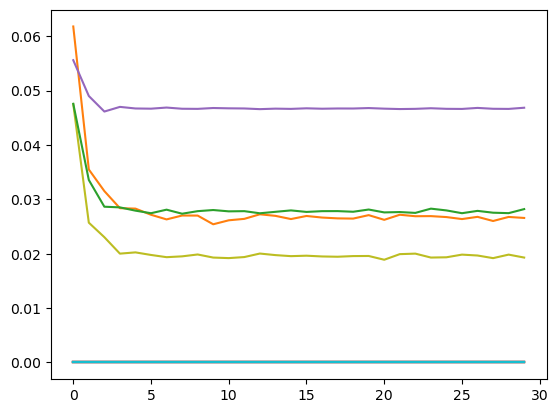

In [5]:
import matplotlib.pyplot as plt

# for i in range(planned_activity.shape[1]):
for i in range(20):
    plt.plot(range(planned_activity.shape[0]), planned_activity[:, i])

In [4]:
planned_activity[0, :]

array([-2.01103519e-12,  6.17945235e-02,  6.89002384e-11,  1.93344212e-12,
        5.55948804e-02,  8.75134661e-12, -2.52891688e-14, -9.46347262e-14,
        4.75083743e-02,  1.75101994e-13, -4.15276630e-14,  1.16963471e-12,
        4.75751845e-02, -4.84806467e-14,  3.58349513e-14,  1.87207708e-12,
        1.11880790e-12, -1.24924275e-13, -4.87165596e-13,  3.64943961e-12,
        1.51391493e-12,  6.37572003e-02,  6.36635513e-02,  6.48488752e-02,
        1.15463464e-12,  7.77116216e-02, -2.25969945e-13,  4.95025599e-02,
        1.51504553e-12,  1.89019346e-12, -4.73498714e-13,  7.29632606e-02,
        3.80798273e-13,  4.19754361e-02,  3.77747524e-02,  1.18182640e-02,
        6.42735042e-03,  6.61177518e-02,  4.05791452e-03,  6.60649085e-02,
       -6.95487180e-11,  1.76537354e-13,  4.66951896e-02,  3.42040384e-13,
        5.39059283e-03,  1.86427908e-12,  4.95110404e-02,  8.96831605e-13,
        3.99073470e-02,  8.84612888e-02,  8.88310361e-02,  8.80888234e-02,
        9.38945813e-02,  